In [26]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [21]:
#Load the dataset
df = pd.read_csv(r"C:\Users\Hamza Akram\Desktop\ML Internship\House price prediction dataset\csvdata.csv")
df.head()


,Unnamed: 0,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3


In [22]:
#Description of the DataSet
df.describe()


,Unnamed: 0,Price,Area,No. of Bedrooms
count,29135.000000,2.913500e+04,29135.000000,29135.000000
mean,3058.808238,1.195267e+07,1301.816475,2.421074
std,1923.174050,2.387647e+07,767.862339,0.821016
min,0.000000,2.000000e+06,200.000000,1.000000
25%,1431.000000,4.179999e+06,870.000000,2.000000
50%,2891.000000,6.884999e+06,1137.000000,2.000000
75%,4539.500000,1.230000e+07,1504.000000,3.000000
max,7718.000000,8.546000e+08,16000.000000,9.000000


In [23]:
#Info About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       29135 non-null  int64 
 1   City             29135 non-null  object
 2   Price            29135 non-null  int64 
 3   Area             29135 non-null  int64 
 4   Location         29135 non-null  object
 5   No. of Bedrooms  29135 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [24]:
# Data cleaning and preprocessing
#Checking for null values
df.isnull().sum()

Unnamed: 0         0
City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [25]:
# Data cleaning and preprocessing
#Checking for duplicate values
df.duplicated().sum()

0

In [32]:
# Feature engineering
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Display the data after encoding
print(df.head())


   Unnamed: 0     Price  Area  No. of Bedrooms  City_Chennai  City_Delhi  \
0           0  30000000  3340                4         False       False   
1           1   7888000  1045                2         False       False   
2           2   4866000  1179                2         False       False   
3           3   8358000  1675                3         False       False   
4           4   6845000  1670                3         False       False   

   City_Hyderabad  City_Kolkata  City_Mumbai  Location_10 Sector Dwarka  ...  \
0           False         False        False                      False  ...   
1           False         False        False                      False  ...   
2           False         False        False                      False  ...   
3           False         False        False                      False  ...   
4           False         False        False                      False  ...   

   Location_tambaram west  Location_thakur village kandivali e

In [28]:
#Feature Scaling
# Define the features and target variable
X = df.drop('Price', axis=1)  
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# Model selection and training (e.g., linear regression)
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Coefficients of the model
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation and fine-tuning
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Model Coefficients: [ 2.27368590e+05  7.12599081e+06 -1.34368283e+06 ... -1.75526556e+16
 -1.75526556e+16 -1.75526556e+16]
Model Intercept: 11821773.839891367
Mean Squared Error: 6.300222718792648e+37
R-squared: -8.488298320982992e+22


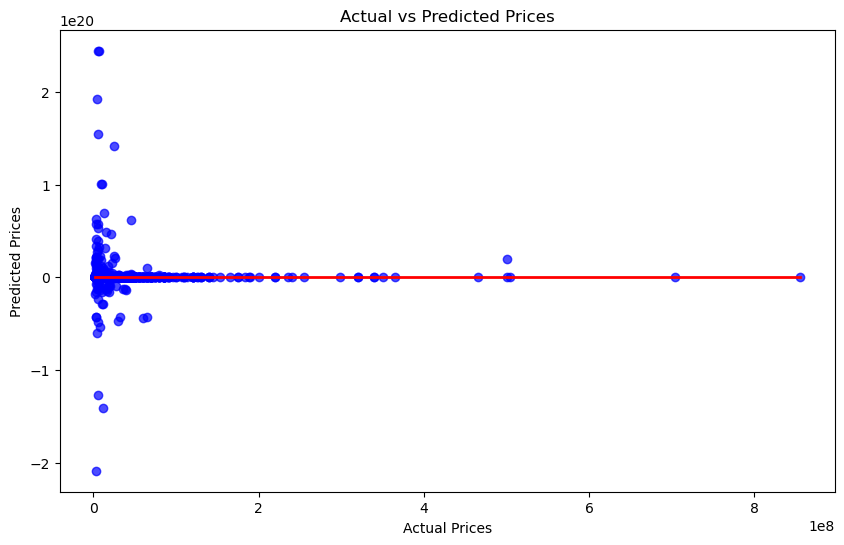

In [31]:
#Visualizing the Results
# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  
plt.show()
